# Introduction
In a series of weekly articles, I will be covering some important topics of statistics with a twist.

The goal is to use Python to help us get intuition on complex concepts, empirically test theoretical proofs, or build algorithms from scratch. In this series, you will find articles covering topics such as random variables, sampling distributions, confidence intervals, significance tests, and more.

At the end of each article, you can find exercises to test your knowledge. The solutions will be shared in the article of the following week.

Articles published so far:
- [Bernoulli and Binomial Random Variables with Python](https://towardsdatascience.com/bernoulli-and-binomial-random-variables-d0698288dd36)
- [From Binomial to Geometric and Poisson Random Variables with Python](https://towardsdatascience.com/geometric-and-poisson-random-variables-with-python-e5dcb63d6b55)
- [Sampling Distribution of a Sample Proportion with Python](https://towardsdatascience.com/sampling-distributions-with-python-f5a5f268f636)
- [Confidence Intervals with Python](https://towardsdatascience.com/confidence-intervals-with-python-bfa28ebb81c)
- [Significance Tests with Python](https://towardsdatascience.com/significance-or-hypothesis-tests-with-python-7ed35e9ac9b6)
- [Two-sample Inference for the Difference Between Groups with Python](https://towardsdatascience.com/two-sample-inference-for-the-difference-between-groups-with-python-de91fbee32f9)
- Inference for Categorical Data

As usual the code is available on my [GitHub](https://github.com/luisroque/College_Statistics_with_Python).

# Chi-square Distribution

Let's start by defining a standard normal distribution Random Variable (RV) $X_1$. 

$$\begin{align}
X_1 \sim \mathcal{N}(0, 1)
\end{align}$$

To define our first Chi-square RV, we sample from our standard normal distribution $X_1$ and square the result. Since we are taking the sum of one standard normally distributed  variable, we define the number of degrees of freedom of our Chi-square distribution to be one. To define a Chi-square RV with 2 degrees of freedom we follow the same idea. This time we sample from two independently standard normally distributed RVs, take the square of the respective samples and finally sum the result.

$$\begin{align}
X_2 &\sim \mathcal{N}(0, 1) \\
Q_2 &= X_1 + X_2 \\
Q_2 &\sim \chi^2_{df=2} \\
\end{align}$$

In [2]:
from scipy.stats import norm, chi2
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from scipy import stats
import tabulate
import pandas as pd
from IPython.display import HTML, display
import tabulate

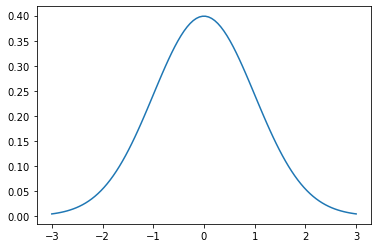

In [5]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.lineplot(x = x, y = norm.pdf(x, loc=mu, scale=sigma));

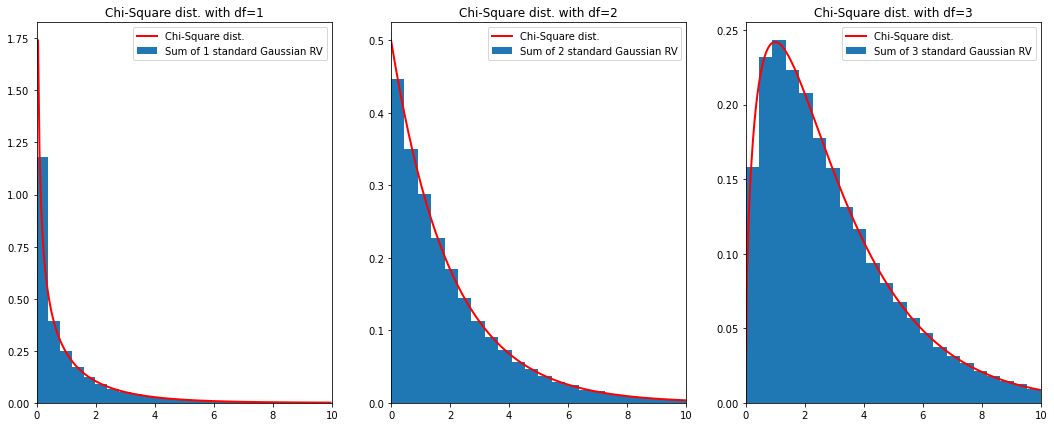

In [6]:
norm_dist = stats.norm(0, 1)

x1 = norm_dist.rvs(size=100000)**2
x2 = norm_dist.rvs(size=100000)**2
x3 = norm_dist.rvs(size=100000)**2

x = [x1, x2, x3]

_, ax = plt.subplots(1, 3, figsize=(18, 7))

f = np.zeros(100000)
for i in range(3):
    x_ = x[i]
    f += x_
    
    ax[i].hist(f, 60, density=True, label=f'Sum of {i+1} standard Gaussian RV')

    d = np.arange(0, 10, .05)
    ax[i].plot(d, stats.chi2.pdf(d, df=i+1), color='r', lw=2, label='Chi-Square dist.')
    ax[i].set_xlim(0, 10)
    ax[i].set_title(f'Chi-Square dist. with df={i+1}')
    ax[i].legend()

# Goodness of Fit

Rui works remotely for a tech company. He likes to work in coffee shops if the number of people is not too high. A new coffee shop opened recently and he wanted to understand the distribution of customers per day of week. This way he would choose the days with smaller percentages to work there. Based on his experience of similar places, he draw the distribution of the number of customers for each day of week. To test this assumption, for the next 3 months he randomly chose one sample of each of the days of the week and recorded the observed number of customers.

In [159]:
table = [["Day",'M','T', 'W', 'T', 'F', 'S', 'S'],
         ["Expected (%)",10,10, 10, 20, 30, 15, 5],
         ["Observed",30, 14, 34, 45, 57, 20, 10]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Day,M,T,W,T,F,S,S
Expected (%),10,10,10,20,30,15,5
Observed,30,14,34,45,57,20,10


Before moving any further, we need to ensure that the conditions for a Chi-square goodness-of-fit test are met. Let's enumerate them first:

* The sample has to be random
* The expected number of each category of outcomes has to be greater or equal to 5 (also called the large counts condition)
* The samples are required to be independent. The rule of thumb is that if you are sampling without replacement your sample size should be less than 10% the population size

We were told that Rui randomly chose each of the days of the week, so the first criteria was fulfilled. For the large counts condition let's calculate the number of expected customers per day of week.

In [178]:
n = 7 # number of days in a week
alpha = 0.05

table = np.asarray(table)[1:,1:]
table = table.astype(np.float32)
table[0] = table[0]/100

In [179]:
total_number_customers = np.sum(table[1])
expected_num = table[0]*total_number_customers

In [182]:
table = np.concatenate((table, expected_num.reshape(1,-1)))
table[2]

array([ 26.460001,  64.26    ,  85.049995, 107.729996,  37.8     ,
        18.9     ], dtype=float32)

 Notice that we do not have any value less than 5. Finally, we have the independence condition. Rui selected each day from a population of 3 months, which gives us 12 possible values for each category. This means that Rui sampled less than 10% of the population size and we can assume independence despite the fact that he sampled without replacement.

With this data, Rui defined the following hypothesis test:

$$\begin{align}
H_0&: \text{Distribution based on similar places is correct} \\
H_1&: \text{Distribution based on similar places is not correct}
\end{align}$$

To start he has to calculate a statistic that compares the estimated and the observed number of customers. It follows approximately a chi-square distribution. Using this statistic, he can calculate the probability of observing that specific value of values even more extreme given that the distribution based on similar places is correct. If this probability is smaller than the significance level (let's use $\alpha=0.05$) we can reject $H_0$ and thus, accept the alternative hypothesis that the new coffee shop has a distribution of customers per day different from the similar places considered by Rui.

In [163]:
chi_sq_statistic = np.sum((table[2]-table[1])**2/table[2])
chi_sq_statistic

19.246035

In [168]:
(1-chi2.cdf(chi_sq_statistic, df=n-1))<alpha

True

In [171]:
if (1-chi2.cdf(chi_sq_statistic, df=n-1))<alpha:
    print('Reject H_0')

Reject H_0


We rejected $H_0$ based on the observations that Rui had been collecting  and that consisted on the number of customers of the new coffee shop per day. The fact that we rejected $H_0$ means that the new place does not follow the assumed distribution defined by Rui based on his experience on similar places. 

# Contingency Table Chi-square Test

A government agency wanted to know if the vaccines against Covid-19 that are being currently administered produce any effect against the new delta variant. They separated the sample of people to do the experiment in 3 different groups: the first one took Pfizer's vaccine, the second took Janssen and the third took a placebo.

In [66]:
table = [['Sick', 15, 10, 30],['Not sick', 100, 110, 90]]
alpha = 0.05
df = pd.DataFrame(table)
df.columns = ['Effect', 'Pfizer', 'Janssen', 'Placebo']
df = df.set_index('Effect')
df

,Pfizer,Janssen,Placebo
Effect,,,
Sick,15,10,30
Not sick,100,110,90


Let's define our hypothesis test:

$$\begin{align}
H_0&: \text{Vaccines do not produce any effect} \\
H_1&: \text{Vaccines produce some effect}
\end{align}$$

Just like in any hypothesis test, we will assume the null hypothesis as true and calculate the likelihood of getting the data collected above. If it is lower than the significance level we reject the null hypothesis.

In [54]:
arr = df.to_numpy()
arr = np.concatenate((arr, (arr.sum(axis=1)[0]/arr.sum() * arr.sum(axis=0)).reshape(1,-1)))
arr = np.concatenate((arr, (arr.sum(axis=1)[1]/arr.sum() * arr.sum(axis=0)).reshape(1,-1)))
arr

array([[ 15.        ,  10.        ,  30.        ],
       [100.        , 110.        ,  90.        ],
       [ 17.81690141,  18.5915493 ,  18.5915493 ],
       [ 97.18309859, 101.4084507 , 101.4084507 ]])

In [55]:
chi_sq_statistic = np.sum((arr[2] - arr[0])**2/arr[2]) + np.sum((arr[3] - arr[1])**2/arr[3])

The number of degrees of freedom that we should use is equal to the number of rows of our table minus one times the number of columns minus one.

In [64]:
print('P-value = ' + str(np.round(1-chi2.cdf(chi_sq_statistic, df =2*1), 4)))

P-value = 0.0012


In [57]:
if 1-chi2.cdf(chi_sq_statistic, df =2*1) < alpha:
    print('Reject H_0')

Reject H_0


We reject $H_0$, meaning that the vaccines produce some effect and impact the number of people that got sick on this experiment.

# Chi-square Test for Homogeneity

The same agency decided to test Pfizer's vaccine but this time the goal was to test the effect on men and women.

This is a homogeneity test, which can be translated to the following hypothesis:

$$\begin{align}
H_0&: \text{No difference in the effect of the vaccine on men and women} \\
H_1&: \text{There is a difference}
\end{align}$$

In [73]:
table = [['Sick', 25, 12],['Not sick', 92, 88]]
alpha = 0.05
df = pd.DataFrame(table)
df.columns = ['Effect', 'Men', 'Women']
df = df.set_index('Effect')
df

,Men,Women
Effect,,
Sick,25,12
Not sick,92,88


In [74]:
arr = df.to_numpy()
arr = np.concatenate((arr, (arr.sum(axis=1)[0]/arr.sum() * arr.sum(axis=0)).reshape(1,-1)))
arr = np.concatenate((arr, (arr.sum(axis=1)[1]/arr.sum() * arr.sum(axis=0)).reshape(1,-1)))
arr

array([[25.        , 12.        ],
       [92.        , 88.        ],
       [19.94930876, 17.05069124],
       [97.05069124, 82.94930876]])

In [75]:
chi_sq_statistic = np.sum((arr[2] - arr[0])**2/arr[2]) + np.sum((arr[3] - arr[1])**2/arr[3])

In [80]:
print('P-value = ' + str(np.round(1-chi2.cdf(chi_sq_statistic, df =1*1), 4)))

P-value = 0.0674


In [79]:
if 1-chi2.cdf(chi_sq_statistic, df =1*1) < alpha:
    print('Reject H_0')
else:
    print('Fail to reject H_0')

Fail to reject H_0


Notice that despite the probability of observing these values or even more extreme values being quite low (about 6.7%) we failed to reject $H_0$. It means that we do not have enough evidence to state that there is a difference in the effect of the vaccine on men and women.

# Chi-squared Test for Association

Finally, let's build a chi-squared test for association between two variables. In this case, we want to test if there is an association between a surfer's height $X$ and the maximum wave size he ever surfed $Y$. Notice that this particular test uses a random sample of a single population.

$$\begin{align}
H_0&: \text{No association between surfer's height and max wave size} \\
H_1&: \text{There is an association}
\end{align}$$

In [117]:
table = [['x<1.6m', 25, 22, 28],['1.6m<=x<1.9m', 10, 21, 35], ['x>=1.9m', 5, 10, 34]]
alpha = 0.05
df = pd.DataFrame(table)
df.columns = ['height', 'y<2m', '2m<=y<4m', 'y>=4m']
df = df.set_index('height')
df

,y<2m,2m<=y<4m,y>=4m
height,,,
x<1.6m,25,22,28
1.6m<=x<1.9m,10,21,35
x>=1.9m,5,10,34


In [118]:
arr = df.to_numpy()

for i in range(arr.shape[0]):
    arr = np.concatenate((arr, (arr.sum(axis=1)[i]/arr.sum() * arr.sum(axis=0)).reshape(1,-1)))
arr

array([[25.        , 22.        , 28.        ],
       [10.        , 21.        , 35.        ],
       [ 5.        , 10.        , 34.        ],
       [15.78947368, 20.92105263, 38.28947368],
       [13.89473684, 18.41052632, 33.69473684],
       [10.31578947, 13.66842105, 25.01578947]])

In [124]:
chi_sq_statistic = np.sum((arr[3] - arr[0])**2/arr[3]) + np.sum((arr[4] - arr[1])**2/arr[4]) + np.sum((arr[5] - arr[2])**2/arr[5])

In [125]:
print('P-value = ' + str(np.round(1-chi2.cdf(chi_sq_statistic, df =2*2), 4)))

P-value = 0.0023


In [126]:
if 1-chi2.cdf(chi_sq_statistic, df =2*2) < alpha:
    print('Reject H_0')
else:
    print('Fail to reject H_0')

Reject H_0


We reject $H_0$, i.e. there is evidence that there is an association between surfer's height and maximum wave size.

# Conclusion

This article covered part of the family of chi-square tests. They are useful to test hypotheses about distributions of categorical data. We assessed good-of-fit tests, where the sample data is tested to see if it fits a hypothesis distribution. We also saw different types of independence tests between two variables. In cases where we sampled our data from two different populations, we test homogeneity and in cases where we sampled from a single population, we test the association between the variables.

# Exercises

You will get the solutions on next week's article.

1. According to a distributor of surf boards, 66%, percent of the boards are common, 25%, percent are uncommon, and 9%, percent are rare. José wondered if the rarity levels of the boards he and his friends owned followed this distribution, so he took a random sample of 500 boards and recorded their rarity levels. The results are presented in the table below. Carry out a goodness-of-fit test to determine if the distribution of rarity levels of surf boards José and his friends own disagrees with the claimed percentages.

In [157]:
table = [['Cards', 345, 125, 30]]
alpha = 0.05
df = pd.DataFrame(table)
df.columns = ['Rarity level', 'Common', 'Uncommon', 'Rare']
df = df.set_index('Rarity level')
df

,Common,Uncommon,Rare
Rarity level,,,
Cards,345,125,30


### Answers from last week

1. Physicians had a hypotheses that the mean time spent in the hospital due to Covid-19 before and after the vaccine changed. A group of 1,000 patients was randomized between a treatment group and a control group. The treatment group had already taken the vaccine while the control group did not. The results show that the mean time spent in the hospital by the treatment group was 10 days less than the time spent by the control group. The table below summarizes the results for the 1,000 re-randomizations of the data. Based on the data, what is the probability of the treatment group's mean being smaller than the one from the control group by 10 days or more? What can you conclude from the experiment's result (assuming a 5% significance level)?

In [160]:
diff = [[-17.5,1],
[-15.0, 6],
[-12.5, 15],
[-10.0, 41],
[-7.5, 82],
[-5.0, 43],
[-2.5, 150],
[0., 167],
[2.5, 132],
[5.0, 127],
[7.5, 173],
[10.0, 38],
[12.5, 18],
[15.0, 6],
[17.5, 1]]

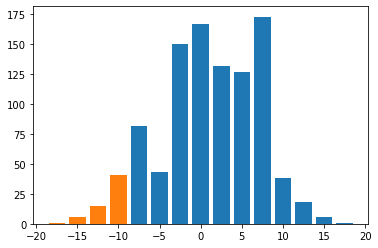

In [196]:
plt.bar(x = np.asarray(diff)[:,0], height = np.asarray(diff)[:,1], width=2, color='C0')
plt.bar(x = np.asarray(diff)[:4,0], height = np.asarray(diff)[:4,1], width=2, color='C1');

In [200]:
diff = np.asarray(diff)

In [208]:
np.sum(diff[diff[:,0]<=-10][:,1])/np.sum(diff[:,1]) < 0.05

False

Based on the significance level of 5%, the result is not significant. The difference that was measured in the experiment could have been result of random chance alone. 